In [43]:
import pandas as pd
import warnings
import io
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [3]:
from google.colab import files


uploaded = files.upload()


Saving Bitcoin Data.csv to Bitcoin Data.csv


Text(0.5, 0, 'Date (2021/06 - 2023/06)')

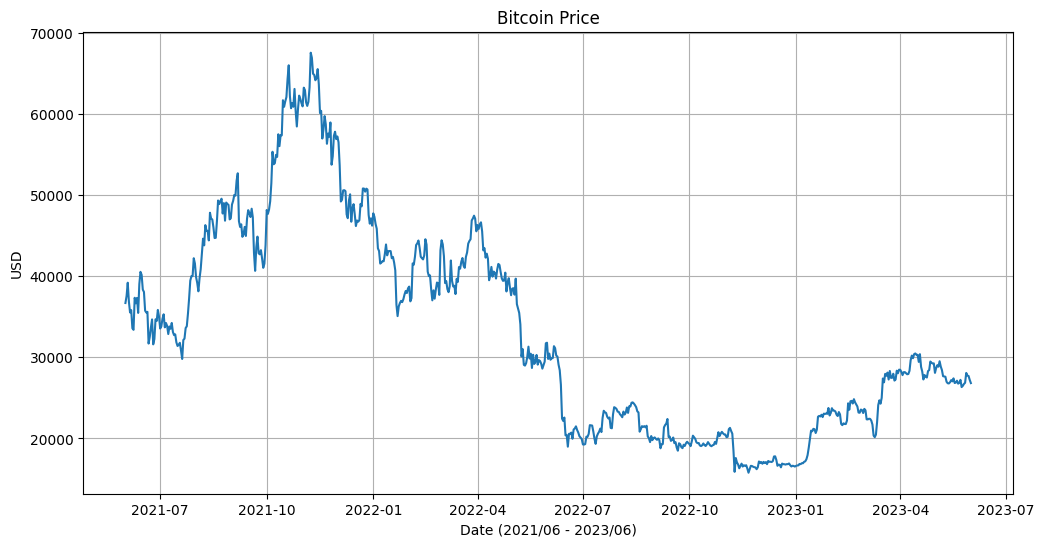

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['Bitcoin Data.csv']))

# Chuyển cột 'Date' sang kiểu dữ liệu ngày tháng
data['Date'] = pd.to_datetime(data['Date'])
data721 = data
data622 = data
data811 = data

# Tạo cột 'Month' để lưu giá trị tháng
data['Month'] = data['Date'].dt.month


# Chọn cột giá Bitcoin (giả sử là cột 'Price') và cột tháng (giả sử là cột 'Month')
x = data['Date']
y = data['Close']

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.grid(True)

# Đặt tiêu đề và nhãn trục
plt.title('Bitcoin Price')
plt.ylabel('USD')
plt.xlabel('Date (2021/06 - 2023/06)')

# Hiển thị đồ thị
#plt.show()

## based models comparisons 6-2-2 split


In [329]:
# 2. Đọc file csv và gắng index với giá Close
df = data
df1=df.reset_index()['Close']
df1

0      36687.6
1      37555.8
2      39187.3
3      36851.3
4      35520.0
        ...   
726    28071.2
727    27739.4
728    27698.2
729    27216.1
730    26819.0
Name: Close, Length: 731, dtype: float64

In [330]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [331]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [332]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [333]:
print(train_size)
print(test_size)
print(val_size)

438
146
147


In [334]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [335]:
y_train

array([0.34332012, 0.34853348, 0.36649231, 0.37722432, 0.3461065 ,
       0.35649843, 0.34958465, 0.33023263, 0.34822431, 0.34268246,
       0.35653901, 0.33499962, 0.32756219, 0.3293515 , 0.31041106,
       0.30178332, 0.30419097, 0.30934636, 0.29102426, 0.2708626 ,
       0.31603213, 0.31926874, 0.34447371, 0.34875376, 0.37901943,
       0.41545302, 0.45748835, 0.46813921, 0.46810443, 0.51065376,
       0.49809958, 0.46572576, 0.45200834, 0.4319491 , 0.46299349,
       0.48483431, 0.52209299, 0.55723773, 0.54136579, 0.58950914,
       0.57616658, 0.57559655, 0.55316444, 0.6189729 , 0.60491346,
       0.60317052, 0.5839441 , 0.55873334, 0.55935554, 0.59862188,
       0.64824537, 0.63958479, 0.64690242, 0.65241335, 0.61714881,
       0.64187843, 0.60008463, 0.64322718, 0.63999637, 0.6376834 ,
       0.60319758, 0.60585836, 0.63849497, 0.64728502, 0.66128842,
       0.65973098, 0.69548247, 0.71294083, 0.59907984, 0.58520203,
       0.59146656, 0.56165498, 0.56782096, 0.58521942, 0.56371

In [336]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],time_step , 1)
X_test = X_test.reshape(X_test.shape[0],time_step , 1)
X_val = X_val.reshape(X_val.shape[0],time_step, 1)

In [337]:
len(X_val)

116

In [338]:
# 8. Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [339]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
7/7 [==============================] - 4s 120ms/step - loss: 0.2169 - val_loss: 0.0015
Epoch 2/30
7/7 [==============================] - 0s 50ms/step - loss: 0.0342 - val_loss: 0.0234
Epoch 3/30
7/7 [==============================] - 0s 63ms/step - loss: 0.0232 - val_loss: 0.0089
Epoch 4/30
7/7 [==============================] - 0s 57ms/step - loss: 0.0181 - val_loss: 0.0082
Epoch 5/30
7/7 [==============================] - 0s 62ms/step - loss: 0.0111 - val_loss: 0.0144
Epoch 6/30
7/7 [==============================] - 0s 72ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 7/30
7/7 [==============================] - 1s 111ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 8/30
7/7 [==============================] - 1s 107ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 9/30
7/7 [==============================] - 1s 106ms/step - loss: 0.0085 - val_loss: 0.0055
Epoch 10/30
7/7 [==============================] - 0s 64ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 11/30
7/7 [========

In [340]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

407
115
116


In [341]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 5ms/step


In [342]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [343]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 25527.54830741989
Testing RMSE: 19162.921475919975


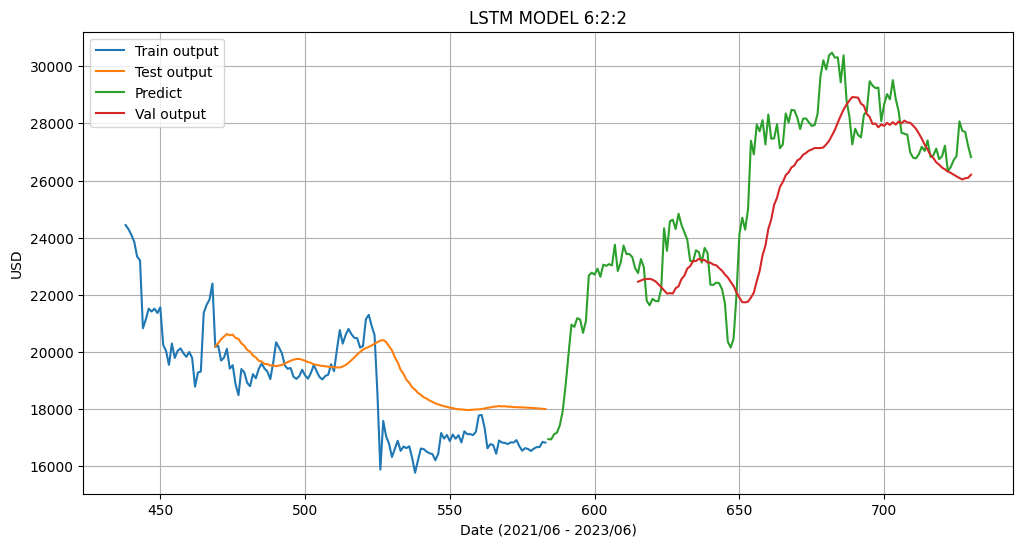

In [344]:
# 14.Vẽ hình
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.grid(True)

# Đặt tiêu đề và nhãn trục
plt.title('LSTM MODEL 6:2:2')
plt.ylabel('USD')
plt.xlabel('Date (2021/06 - 2023/06)')

#train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
#plt.plot(scaler.inverse_transform(train_data))


test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))


test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data)

         )
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
#plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train output','Test output','Predict','Val output','Val Predict'])
plt.show()

In [345]:
#Chuyển dữ liệu về miến giá trị ban đầu
actual_test = column_or_1d(ytest)
actual_val = column_or_1d(yval)
pred_test = column_or_1d(y_pred)
pred_val = column_or_1d(y_pred_val)

inv_actual_test = scaler.inverse_transform(actual_test.reshape(-1,1))
inv_actual_val = scaler.inverse_transform(actual_val.reshape(-1,1))
inv_pred_test = scaler.inverse_transform(pred_test.reshape(-1,1))
inv_pred_val = scaler.inverse_transform(pred_val.reshape(-1,1))

mae = mean_absolute_error(inv_actual_test,y_pred)
mape = mean_absolute_percentage_error(inv_actual_test,y_pred)
mse = mean_squared_error(inv_actual_test,y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse :.2f}")

mae = mean_absolute_error(inv_actual_val, y_pred_val)
mape = mean_absolute_percentage_error(inv_actual_val, y_pred_val)
mse = mean_squared_error(inv_actual_val, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse :.2f}")
print(f"RMSE: {rmse :.2f}")

-TEST-
MAPE: 6.40%
RMSE: 1395.54
-VALID-
MAPE: 4.93%
RMSE: 1719.62


## based models comparisons 7-2-1 split


In [346]:
# 2. Đọc file csv và gắng index với giá Close
df = data
df1=df.reset_index()['Close']
df1

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
#test_data = train_data
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],time_step , 1)
X_test = X_test.reshape(X_test.shape[0],time_step , 1)
X_val = X_val.reshape(X_val.shape[0],time_step, 1)

# 8. Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [347]:
print(train_size)
print(test_size)
print(val_size)

511
146
74


In [348]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
8/8 [==============================] - 4s 103ms/step - loss: 0.1382 - val_loss: 0.0057
Epoch 2/30
8/8 [==============================] - 0s 51ms/step - loss: 0.0294 - val_loss: 0.0058
Epoch 3/30
8/8 [==============================] - 0s 52ms/step - loss: 0.0157 - val_loss: 0.0029
Epoch 4/30
8/8 [==============================] - 0s 51ms/step - loss: 0.0119 - val_loss: 0.0048
Epoch 5/30
8/8 [==============================] - 0s 55ms/step - loss: 0.0102 - val_loss: 0.0018
Epoch 6/30
8/8 [==============================] - 0s 54ms/step - loss: 0.0087 - val_loss: 0.0013
Epoch 7/30
8/8 [==============================] - 1s 66ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 8/30
8/8 [==============================] - 0s 57ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 9/30
8/8 [==============================] - 1s 68ms/step - loss: 0.0073 - val_loss: 0.0016
Epoch 10/30
8/8 [==============================] - 0s 52ms/step - loss: 0.0071 - val_loss: 0.0014
Epoch 11/30
8/8 [===========

2/2 [==============================] - 0s 9ms/step
Validation RMSE: 26786.874051393854
Testing RMSE: 20734.82290161062


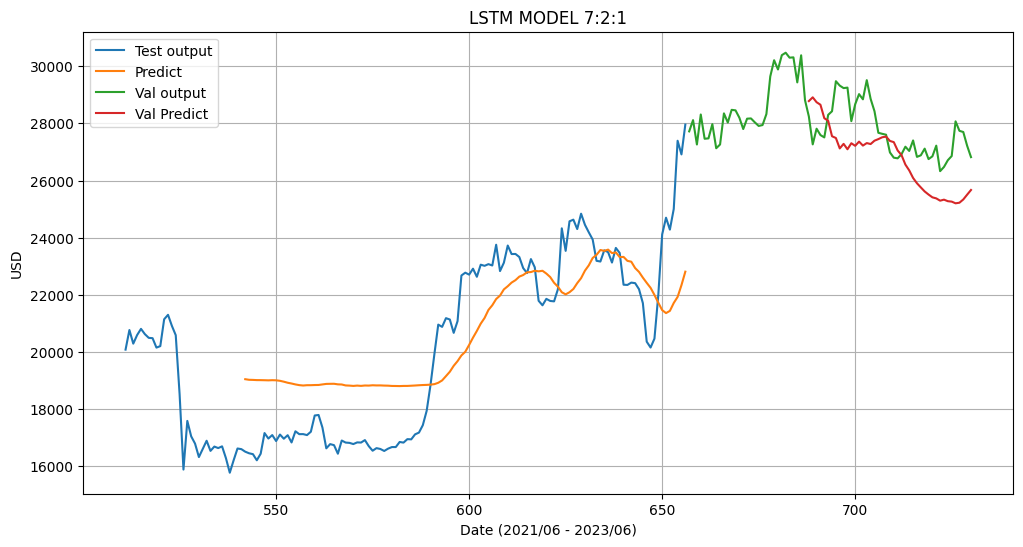

In [349]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 14.Vẽ hình
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.grid(True)

# Đặt tiêu đề và nhãn trục
plt.title('LSTM MODEL 7:2:1')
plt.ylabel('USD')
plt.xlabel('Date (2021/06 - 2023/06)')

#train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
#plt.plot(scaler.inverse_transform(train_data))


test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))


test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data)

         )
val_data_index = pd.RangeIndex(start=train_size+test_size+31, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
#plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Test output','Predict','Val output','Val Predict'])
plt.show()

In [350]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 26786.874051393854
Testing RMSE: 20734.82290161062


In [351]:
#Chuyển dữ liệu về miến giá trị ban đầu
actual_test = column_or_1d(ytest)
actual_val = column_or_1d(yval)
pred_test = column_or_1d(y_pred)
pred_val = column_or_1d(y_pred_val)

inv_actual_test = scaler.inverse_transform(actual_test.reshape(-1,1))
inv_actual_val = scaler.inverse_transform(actual_val.reshape(-1,1))
inv_pred_test = scaler.inverse_transform(pred_test.reshape(-1,1))
inv_pred_val = scaler.inverse_transform(pred_val.reshape(-1,1))

In [352]:
mae = mean_absolute_error(inv_actual_test,y_pred)
mape = mean_absolute_percentage_error(inv_actual_test,y_pred)
mse = mean_squared_error(inv_actual_test,y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse :.2f}")

mae = mean_absolute_error(inv_actual_val, y_pred_val)
mape = mean_absolute_percentage_error(inv_actual_val, y_pred_val)
mse = mean_squared_error(inv_actual_val, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse :.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAPE: 8.22%
RMSE: 1813.04
-VALID-
MAPE: 4.36%
RMSE: 1407.65


## based models comparisons 8-1-1 split


In [353]:
# 2. Đọc file csv và gắng index với giá Close
df = data
df1=df.reset_index()['Close']
df1

# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
#test_data = train_data
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],time_step , 1)
X_test = X_test.reshape(X_test.shape[0],time_step , 1)
X_val = X_val.reshape(X_val.shape[0],time_step, 1)

# 8. Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [354]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
9/9 [==============================] - 5s 99ms/step - loss: 0.1024 - val_loss: 0.0106
Epoch 2/30
9/9 [==============================] - 0s 55ms/step - loss: 0.0216 - val_loss: 0.0022
Epoch 3/30
9/9 [==============================] - 1s 94ms/step - loss: 0.0145 - val_loss: 0.0030
Epoch 4/30
9/9 [==============================] - 1s 111ms/step - loss: 0.0096 - val_loss: 0.0012
Epoch 5/30
9/9 [==============================] - 1s 105ms/step - loss: 0.0074 - val_loss: 8.8669e-04
Epoch 6/30
9/9 [==============================] - 1s 59ms/step - loss: 0.0070 - val_loss: 0.0024
Epoch 7/30
9/9 [==============================] - 1s 60ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 8/30
9/9 [==============================] - 1s 59ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 9/30
9/9 [==============================] - 1s 59ms/step - loss: 0.0059 - val_loss: 0.0013
Epoch 10/30
9/9 [==============================] - 0s 52ms/step - loss: 0.0057 - val_loss: 0.0010
Epoch 11/30
9/9 [======

2/2 [==============================] - 0s 9ms/step
Validation RMSE: 27233.27790501423
Testing RMSE: 22371.25562276323


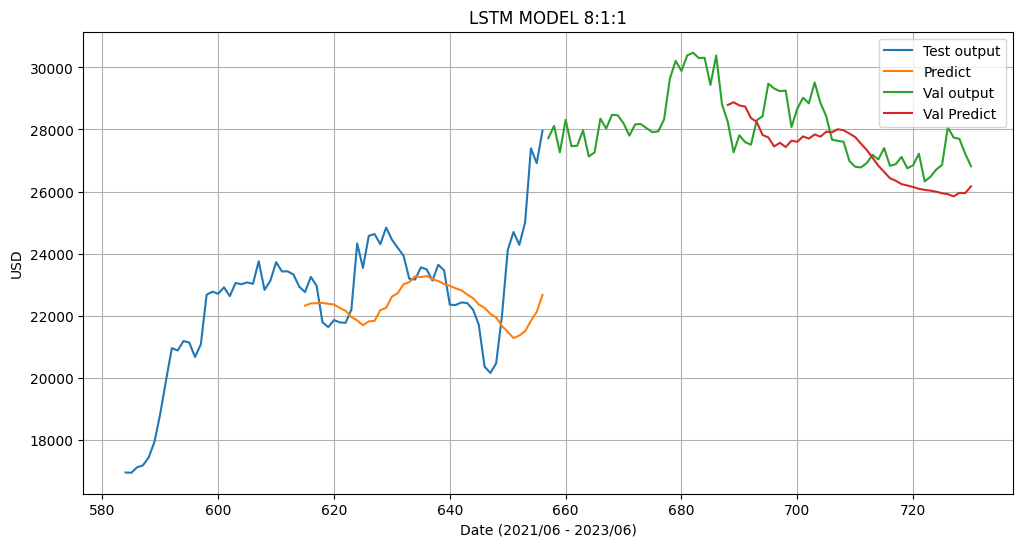

In [355]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 14.Vẽ hình
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.grid(True)

# Đặt tiêu đề và nhãn trục
plt.title('LSTM MODEL 8:1:1')
plt.ylabel('USD')
plt.xlabel('Date (2021/06 - 2023/06)')

#train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
#plt.plot(scaler.inverse_transform(train_data))


test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))


test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data)

         )
val_data_index = pd.RangeIndex(start=train_size+test_size+31, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
#plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Test output','Predict','Val output','Val Predict'])
plt.show()

In [356]:
#Chuyển dữ liệu về miến giá trị ban đầu
actual_test = column_or_1d(ytest)
actual_val = column_or_1d(yval)
pred_test = column_or_1d(y_pred)
pred_val = column_or_1d(y_pred_val)

inv_actual_test = scaler.inverse_transform(actual_test.reshape(-1,1))
inv_actual_val = scaler.inverse_transform(actual_val.reshape(-1,1))
inv_pred_test = scaler.inverse_transform(pred_test.reshape(-1,1))
inv_pred_val = scaler.inverse_transform(pred_val.reshape(-1,1))

mae = mean_absolute_error(inv_actual_test,y_pred)
mape = mean_absolute_percentage_error(inv_actual_test,y_pred)
mse = mean_squared_error(inv_actual_test,y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse :.2f}")

mae = mean_absolute_error(inv_actual_val, y_pred_val)
mape = mean_absolute_percentage_error(inv_actual_val, y_pred_val)
mse = mean_squared_error(inv_actual_val, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse :.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAPE: 5.28%
RMSE: 1777.51
-VALID-
MAPE: 3.21%
RMSE: 1047.41
